In [76]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [169]:
def rbf_kernel(X,image_number):
    sigma_s = -0.02
    sigma_c = -0.02
    W = np.zeros((10000,10000))
    for i in range(10000):
        x1 = i//100
        y1 = i%100
        for j in range(i+1,10000):
            x2 = j//100
            y2 = j%100
            if image_number==1:
                w = np.exp(sigma_s*((x1-x2)**2+(y1-y2)**2))*np.exp(sigma_c*(np.linalg.norm(im[x1,y1]-im[x2,y2])**2))
            else:
                w = np.exp(sigma_s*((x1-x2)**2+(y1-y2)**2))*np.exp(sigma_c*(np.linalg.norm(im2[x1,y1]-im2[x2,y2])**2))
            W[i,j] = W[j,i] = w
    return W

In [192]:
def init(method,k,image_number):
    if method == 0:
        print('Init method: random')
        return np.random.randint(k,size=10000)
    else:
        print('Init method: kmeans++')
        res = np.zeros(10000)
        means = np.zeros(k)
        means[0] = np.random.randint(10000)
        for i in range(1,k):
            dist = np.zeros(10000)
            for j in range(10000):
                temp = np.zeros(i)
                x = j//100
                y = j%100
                for p in range(i):
                    xm = int(means[p]//100)
                    ym = int(means[p]%100)
                    if image_number==1:
                        temp[p] = (xm-x)**2+(ym-y)**2+np.linalg.norm(im[xm,ym]-im[x,y])**2
                    else:
                        temp[p] = (xm-x)**2+(ym-y)**2+np.linalg.norm(im2[xm,ym]-im2[x,y])**2
                dist[j] = np.min(temp)
            dist = dist/dist.sum()
            means[i] = np.random.choice(10000,1,p=dist)
        for i in range(10000):
            temp = np.zeros(k)
            x=i//100
            y=i%100
            for j in range(k):
                xm = int(means[j]//100)
                ym = int(means[j]%100)
                if image_number==1:
                    temp[p] = (xm-x)**2+(ym-y)**2+np.linalg.norm(im[xm,ym]-im[x,y])**2
                else:
                    temp[p] = (xm-x)**2+(ym-y)**2+np.linalg.norm(im2[xm,ym]-im2[x,y])**2
            res[i] = np.argmin(temp)
        return res

In [144]:
def second_term(kernel_data,res_prev,node,cluster):
    temp = 0
    for i in range(10000):
        if res_prev[i]==cluster:
            temp += kernel_data[node][i]
    return temp

In [130]:
def third_term(kernel_data,res_prev,k):
    C = np.zeros(k)
    for c in range(k):
        for i in range(10000):
            for j in range(i+1,10000):
                if res_prev[i]==c and res_prev[j]==c :
                    C[c] += kernel_data[i][j]
    return C

In [158]:
def classify(kernel_data,res_prev,k):
    res = np.zeros(10000)
    unique, counts = np.unique(res_prev, return_counts=True)
    third = third_term(kernel_data,res_prev,k)
    for j in range(10000):
        temp = np.zeros(k)
        for c in range(k):
            temp[c]+=(0-2*second_term(kernel_data,res_prev,j,c)/counts[c]+third[c]/counts[c]**2)
        res[j] = np.argmin(temp)
    return res

In [180]:
def draw(res,image_number,iteration):
    plt.title("Kernel K means after {} iters, Image {}".format(iteration,image_number))
    if image_number==1:
        plt.imshow(im.astype('int'))
    else:
        plt.imshow(im2.astype('int'))
    plt.imshow(res.reshape(100,100),alpha = 1)
    plt.savefig('KernelKmeans-{}iters-image{}.png'.format(iteration,image_number))

In [183]:
def kernel_kmean(kernel_data,image_number,k=2):
    for i in range(1,2):
        iteration = np.zeros(2)
        res_prev = init(i,k,image_number)
        while(1):
            iteration[i]+=1
            diff = prev_diff = 0
            res = classify(kernel_data,res_prev,k)
            draw(res,image_number,iteration[i])
            for j in range(10000):
                if res[j] != res_prev[j]:
                    diff += 1
            print('iteration: {}, diff: {}'.format(iteration[i],diff))
            if diff == prev_diff:
                break
            res_prev = res
            prev_diff = diff

In [37]:
im = imageio.imread('image1.png').astype('float32')
im2 = imageio.imread('image2.png').astype('float32')

In [170]:
W1 = rbf_kernel(im,1)

In [58]:
W2 = rbf_kernel(im2,2)

array([[0.00000000e+000, 2.83654042e-001, 3.92652902e-003, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.83654042e-001, 0.00000000e+000, 2.18711854e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [3.92652902e-003, 2.18711854e-001, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.73056346e-158, 2.20295092e-027],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.73056346e-158, 0.00000000e+000, 1.44827233e-151],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        2.20295092e-027, 1.44827233e-151, 0.00000000e+000]])

In [ ]:
kernel_kmean(W1,1,k=3)

Init method: kmeans++


Init method: random
iteration: 1.0, diff: 6715
iteration: 2.0, diff: 4007
iteration: 3.0, diff: 2475


KeyboardInterrupt: 

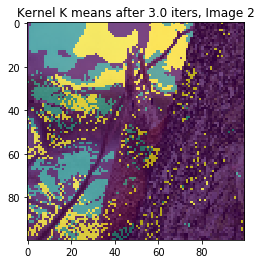

In [178]:
kernel_kmean(W2,2,k=3)

In [91]:
g = np.zeros((50,100))
gg = np.ones((50,100))
g = np.concatenate((g,gg),axis=0)

In [121]:
xx = np.random.randint(2,size=10000).reshape(100,100)
xx

array([[0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

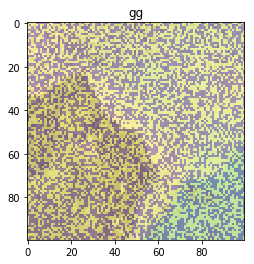

In [174]:
image_number=1
plt.title("gg")
if image_number==1:
    plt.imshow(im.astype('int'))
else:
    plt.imshow(im2.astype('int'))
plt.imshow(xx,alpha = 0.4)
plt.savefig('gg.png')

In [156]:
x = np.random.randint(3,size=10000)
unique, counts = np.unique(x, return_counts=True)
counts

array([3423, 3295, 3282])

In [157]:
unique

array([0, 1, 2])

In [131]:
1/2**2

0.25

In [135]:
print("{}".format(1))

1
